In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt

# load data and split into training and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype(float)
y_train = y_train.astype(float)
x_test = x_test.astype(float)
y_test = y_test.astype(float)

# note x_train is a numpy array with size (60000, 28 28)
print(np.shape(x_train))
print(np.shape(x_test))

# for this assignment, only use the first 2000 training examples
x_train = x_train[0:2000,:,:]
y_train = y_train[0:2000]

11493376/11490434 [==============================] - 3s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## Prob. 1

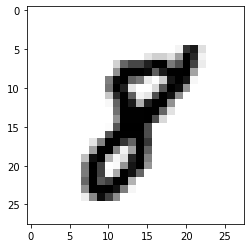

In [4]:
# Prob. 1
# note that you can access the ith image in x_train as x_train[i-1,:,:]
# use plt.imshow(the_image, cmap=plt.cm.gray_r) to display image

img = x_train[17, :, :]
plt.imshow(img, cmap=plt.cm.gray_r)

## Prob. 2

5


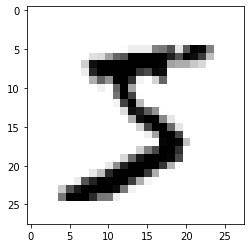

In [11]:
# Prob. 2
# displaying first 3 images and their labels
img = img = x_train[0, :, :]
plt.imshow(img, cmap=plt.cm.gray_r)
label = int(y_train[0])
print(label)


0


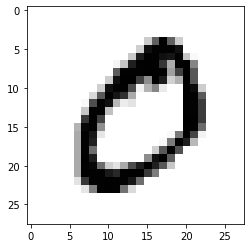

In [12]:
img = img = x_train[1, :, :]
plt.imshow(img, cmap=plt.cm.gray_r)
label = int(y_train[1])
print(label)

4


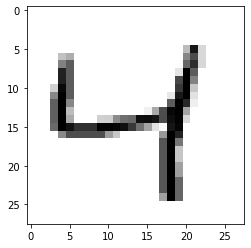

In [16]:
img = x_train[2, :, :]
plt.imshow(img, cmap=plt.cm.gray_r)
label = int(y_train[2])
print(label)

## Prob. 3

## a

In [33]:
# prob 3a. 

## nearest neighbor classifier
def f(_x):
    #check to make sure input is a single 28x28 np array
    assert np.shape(_x)==np.shape(x_train[0]) 
    ### write code here to compute the index of the nearest neighbor 
    l2_min = np.linalg.norm(x_train[0, :, :]- _x)
    nearest_neighbor= -1
    for i in range(2000):
        l2 = np.linalg.norm(x_train[i, :, :]- _x)
        l2_min = min(l2_min, l2)
        if l2 == l2_min:
            nearest_neighbor = i
    #return the label of the nearest neighbor, and index
    return (y_train[nearest_neighbor], nearest_neighbor)  

## b

predicted label =  7.0
actual label =  7.0


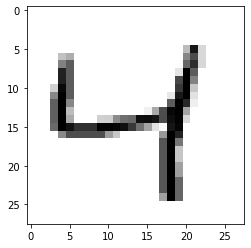

In [36]:
# using the first test image
t_img = x_test[0, :, :]
plt.imshow(img, cmap=plt.cm.gray_r)
p_label, index = f(t_img)
print("predicted label = ", p_label)
print("actual label = ", y_test[0])

predicted class is correct. <br>
misclassification loss = 0 <br>
SQ error loss = 0

## c

In [66]:
t_misclass = 0
t_l2 = 0
for i in range(1000):
    t_img = x_test[i, :, :]
    p_label, index = f(t_img)
    t_misclass += (p_label != y_test[i])
    t_l2 += (float)((int(p_label) - int(y_test[i]))^2)
emp_risk_class = t_misclass / 1000
emp_risk_l2 = t_l2 / 1000
print("empirical risk w/ misclassification = ", emp_risk_class)
print("empirical risk w/ l2 = ", emp_risk_l2)

empirical risk w/ misclassification =  0.127
empirical risk w/ l2 =  1.737


## d

predicted label =  9.0
actual label =  4.0


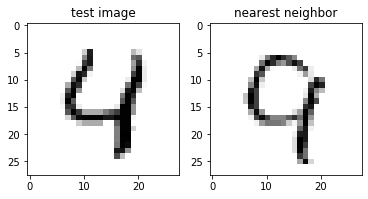

In [60]:
for i in range(100):
    t_img = x_test[i, :, :]
    p_label, index = f(t_img)
    if p_label != y_test[i]:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.imshow(t_img, cmap=plt.cm.gray_r)
        ax1.set_title('test image')
        ax2.imshow(x_train[index, :, :], cmap=plt.cm.gray_r)
        ax2.set_title('nearest neighbor')
        print("predicted label = ", p_label)
        print("actual label = ", y_test[i])
        break

predicted label =  5.0
actual label =  9.0


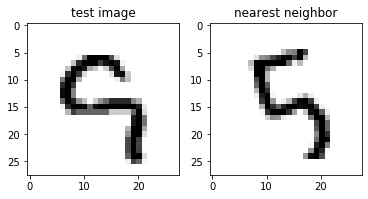

In [61]:
for i in range(100, 200):
    t_img = x_test[i, :, :]
    p_label, index = f(t_img)
    if p_label != y_test[i]:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.imshow(t_img, cmap=plt.cm.gray_r)
        ax1.set_title('test image')
        ax2.imshow(x_train[index, :, :], cmap=plt.cm.gray_r)
        ax2.set_title('nearest neighbor')
        print("predicted label = ", p_label)
        print("actual label = ", y_test[i])
        break

predicted label =  5.0
actual label =  6.0


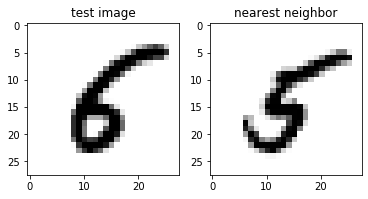

In [62]:
for i in range(200, 300):
    t_img = x_test[i, :, :]
    p_label, index = f(t_img)
    if p_label != y_test[i]:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.imshow(t_img, cmap=plt.cm.gray_r)
        ax1.set_title('test image')
        ax2.imshow(x_train[index, :, :], cmap=plt.cm.gray_r)
        ax2.set_title('nearest neighbor')
        print("predicted label = ", p_label)
        print("actual label = ", y_test[i])
        break

These test images are very close to their respective nearest neighbors. The classifier misclassified these images because they resemble multiple digits. 